In [1]:
%matplotlib inline 

In [2]:
#To Suppress the warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
#import required information
import numpy as np 
import pandas as pd

In [8]:
import pandas as pd
columns = ['n_preg', 'glucose', 'diastolic_bp', 'thickness',
           'insulin', 'bmi', 'pedigree', 'age', 'class']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', header=None, names=columns)


In [10]:
df.head(6)

,n_preg,glucose,diastolic_bp,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [11]:
df.describe() 

,n_preg,glucose,diastolic_bp,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# value 0 corresponds to missing value and needs to be imputed
cols = ['n_preg', 'glucose', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'pedigree', 'age']
for col in cols:
    print (col, df[df[col]==0].shape)

n_preg (111, 9)
glucose (5, 9)
diastolic_bp (35, 9)
thickness (227, 9)
insulin (374, 9)
bmi (11, 9)
pedigree (0, 9)
age (0, 9)


In [13]:
# replace zero value with mean of its corresponding class
for col in cols:
    mean0 = df.loc[df[col]!=0, [col, 'class']].groupby('class').mean().iloc[0,0]
    mean1 = df.loc[df[col]!=0, [col, 'class']].groupby('class').mean().iloc[1,0]
    df.loc[(df[col]==0) & (df['class']==0), col] = mean0
    df.loc[(df[col]==0) & (df['class']==1), col] = mean1

In [15]:
# read the imputed data
df.head(11)

,n_preg,glucose,diastolic_bp,thickness,insulin,bmi,pedigree,age,class
0,6.000000,148.0,72.000000,35.000000,206.846154,33.600000,0.627,50.0,1
1,1.000000,85.0,66.000000,29.000000,130.287879,26.600000,0.351,31.0,0
2,8.000000,183.0,64.000000,33.000000,206.846154,23.300000,0.672,32.0,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0
4,5.669565,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1
5,5.000000,116.0,74.000000,27.235457,130.287879,25.600000,0.201,30.0,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1
7,10.000000,115.0,70.877339,27.235457,130.287879,35.300000,0.134,29.0,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1
9,8.000000,125.0,96.000000,33.000000,206.846154,35.406767,0.232,54.0,1


Text(0.5,1,'Correlation Matrix for Pima Indians Diabetes Data')

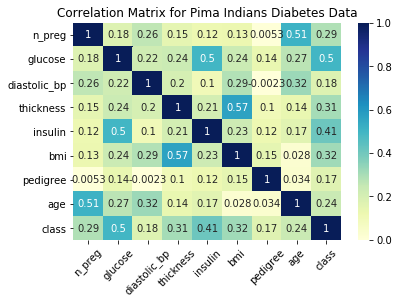

In [18]:
# we want to see the correlation between pairs of variables
# a basis for feature selection
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.title('Correlation Matrix for Pima Indians Diabetes Data') 

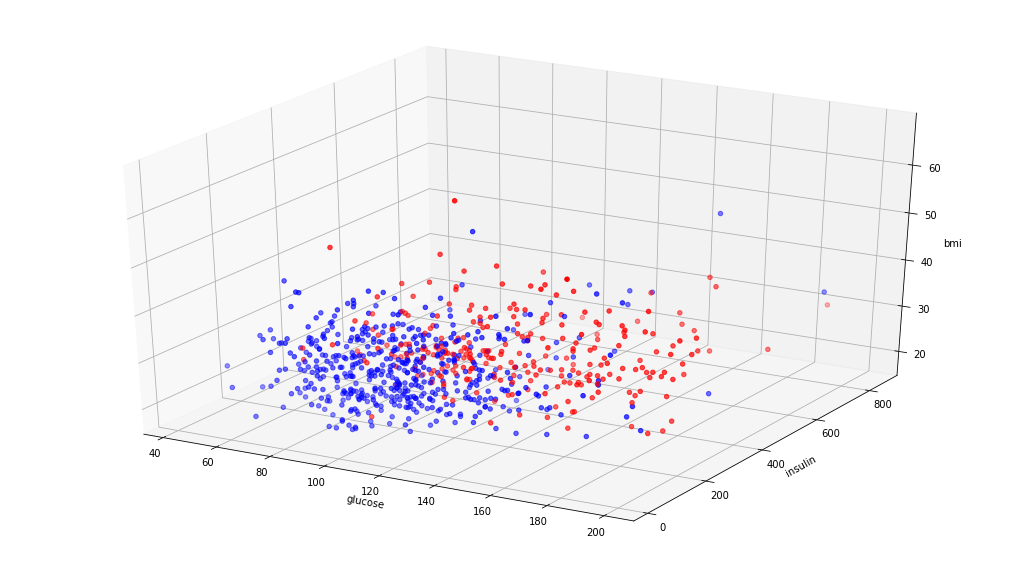

In [23]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

feature1 = df['glucose'].values
feature2 = df['insulin'].values 
feature3 = df['bmi'].values


df['class']=df['class'].astype('str')

c = df['class'].values
df['class']=df['class'].astype('int')
c[c=='0'] = 'b' 
c[c=='1'] = 'r' 

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('glucose')
ax.set_ylabel('insulin')
ax.set_zlabel('bmi')


plt.show()